In [4]:
# import relevant packages
import numpy as np
import pandas as pd
from nilearn.datasets import fetch_abide_pcp
from nilearn.connectome import ConnectivityMeasure
from nilearn import plotting
from nilearn.signal import clean
import scipy.io as sio
import matplotlib.pyplot as plt

# import matched-age subject IDs
ID_info = pd.read_csv("matchedIDs_female.csv")
subIDs = ID_info.values[:,0]
print(f"Number of matched age subjects: {len(subIDs)}")

Number of matched age subjects: 470


C:\Users\samaj\Anaconda3\lib\site-packages\numpy\lib\npyio.py:2278: VisibleDeprecationWarning: Reading unicode strings without specifying the encoding argument is deprecated. Set the encoding, use None for the system default.
  output = genfromtxt(fname, **kwargs)


Shape of MASD_stack : (200, 200, 124)


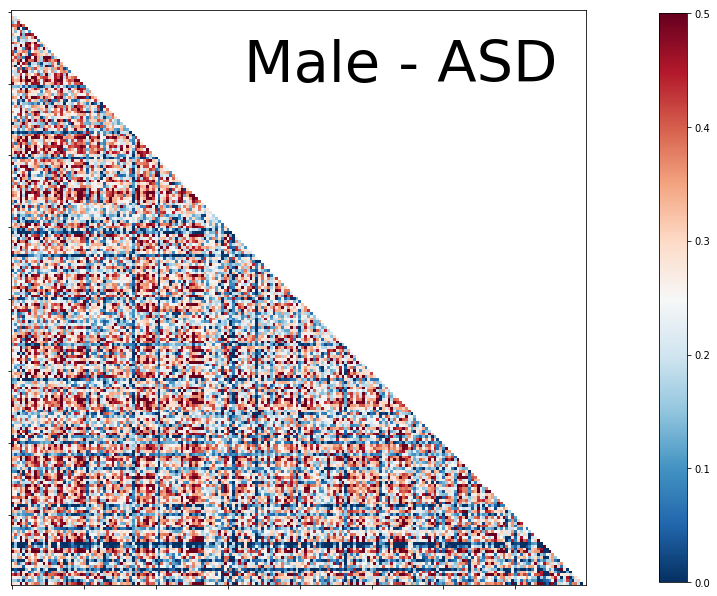

In [6]:
# Import data from subjects with ASD
siteID = ['OHSU', 'PITT', 'SDSU', 'TRINITY', 'UM_1', 'UM_2', 'USM', 'YALE', 'CMU', 'LEUVEN_1', 'LEUVEN_2', 'KKI', 'NYU', 'STANFORD','UCLA_1','UCLA_2','MAX_MUN','CALTECH','SBL'] # acceptable study sites
MASD_abide = fetch_abide_pcp(pipeline = 'ccs', derivatives=['rois_cc200'], DX_GROUP = [1], HANDEDNESS_CATEGORY = "R", FIQ = np.linspace(0,150,151), SITE_ID = siteID, SUB_ID = subIDs) # fetch data from ABIDE
MASD_accept = np.where((MASD_abide.phenotypic.func_mean_fd < 0.15) & (MASD_abide.phenotypic.FIQ > 80))[0] # indices of subjects with acceptable levels of mean FD and FIQ

# isolate data from subjects that fit criteria
MASD_abide_accept = [MASD_abide.rois_cc200[idx] for idx in MASD_accept] # connectivity data 
MASD_DX = [MASD_abide.phenotypic.DX_GROUP[idx] for idx in MASD_accept] # diagnosis
MASD_FD = [MASD_abide.phenotypic.func_mean_fd[idx] for idx in MASD_accept] # framewise displacement
MASD_FIQ = [MASD_abide.phenotypic.FIQ[idx] for idx in MASD_accept] # FIQ
MASD_ID = [MASD_abide.phenotypic.SUB_ID[idx] for idx in MASD_accept] # subject ID
MASD_AGE = [MASD_abide.phenotypic.AGE_AT_SCAN[idx] for idx in MASD_accept] # age
MASD_SITE = [MASD_abide.phenotypic.SITE_ID[idx] for idx in MASD_accept] # site
MASD_EYE = [MASD_abide.phenotypic.EYE_STATUS_AT_SCAN[idx] for idx in MASD_accept] # eye status
MASD_SEX = [MASD_abide.phenotypic.SEX[idx] for idx in MASD_accept] # sex

# compute functional connectivity matrix
conn_est = ConnectivityMeasure(kind='correlation')
conn_matrices_MASD = conn_est.fit_transform(MASD_abide_accept)

# plot connectivity matrix for first subject
plotting.plot_matrix(conn_matrices_MASD[0],tri='lower', vmax=0.5, vmin=0, figure = (10,10),title = "Male - ASD")

# reshape connectivity matrix to PxPxN (P - # ROIs, N - # subjects)
MASD_split = np.vsplit(conn_matrices_MASD,len(MASD_abide_accept))
MASD_stack = np.squeeze(MASD_split[0])
for i in range(1,len(MASD_split)):
    MASD_stack = np.dstack((MASD_stack,np.squeeze(MASD_split[i])))
print(f"Shape of MASD_stack : {MASD_stack.shape}")

C:\Users\samaj\Anaconda3\lib\site-packages\numpy\lib\npyio.py:2278: VisibleDeprecationWarning: Reading unicode strings without specifying the encoding argument is deprecated. Set the encoding, use None for the system default.
  output = genfromtxt(fname, **kwargs)


Shape of MNT_stack : (200, 200, 151)


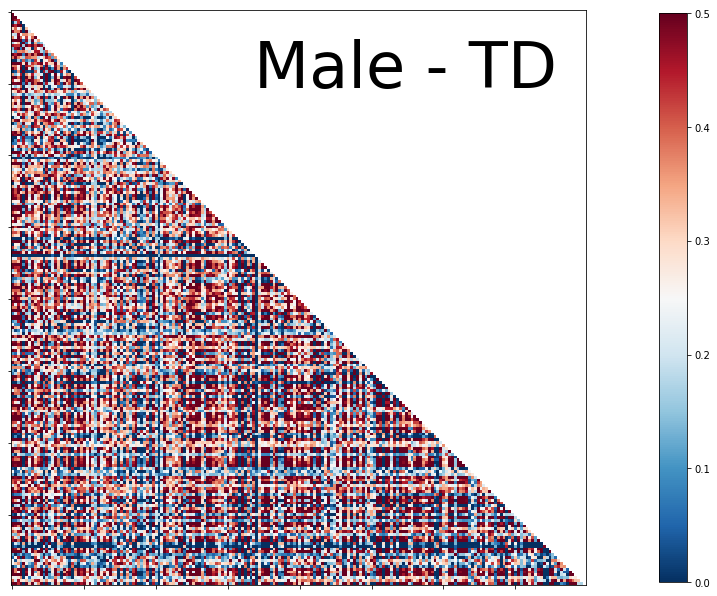

In [7]:
# Import data from subjects with typical development
MNT_abide = fetch_abide_pcp(pipeline = 'ccs',derivatives=['rois_cc200'], DX_GROUP = [2], FIQ = np.linspace(0,150,151), HANDEDNESS_CATEGORY = "R", SITE_ID = siteID, SUB_ID = subIDs) # fetch data from ABIDE
MNT_accept = np.where((MNT_abide.phenotypic.func_mean_fd < 0.15) & (MNT_abide.phenotypic.FIQ > 80))[0] # indices of subjects with acceptable levels of mean FD and FIQ

# isolate data from subjects that fit criteria
MNT_abide_accept = [MNT_abide.rois_cc200[idx] for idx in MNT_accept] # connectivity data
MNT_DX = [MNT_abide.phenotypic.DX_GROUP[idx] for idx in MNT_accept] # diagnosis
MNT_FD = [MNT_abide.phenotypic.func_mean_fd[idx] for idx in MNT_accept] # framewise displacement
MNT_FIQ = [MNT_abide.phenotypic.FIQ[idx] for idx in MNT_accept] # FIQ
MNT_ID = [MNT_abide.phenotypic.SUB_ID[idx] for idx in MNT_accept] # subject ID
MNT_AGE = [MNT_abide.phenotypic.AGE_AT_SCAN[idx] for idx in MNT_accept] # age
MNT_SITE = [MNT_abide.phenotypic.SITE_ID[idx] for idx in MNT_accept] # site
MNT_EYE = [MNT_abide.phenotypic.EYE_STATUS_AT_SCAN[idx] for idx in MNT_accept] # eye status
MNT_SEX = [MNT_abide.phenotypic.SEX[idx] for idx in MNT_accept] # sex

# compute functional connectivity matrix
conn_est = ConnectivityMeasure(kind='correlation')
conn_matrices_MNT = conn_est.fit_transform(MNT_abide_accept)

# plot connectivity matrix for first subject
plotting.plot_matrix(conn_matrices_MNT[0],tri='lower', vmax=0.5, vmin=0, figure = (10,10),title = "Male - TD")


# reshape connectivity matrix to PxPxN (P - # ROIs, N - # subjects)
MNT_split = np.vsplit(conn_matrices_MNT,len(MNT_abide_accept))
MNT_stack = np.squeeze(MNT_split[0])
for i in range(1,len(MNT_split)):
    MNT_stack = np.dstack((MNT_stack,np.squeeze(MNT_split[i])))
print(f"Shape of MNT_stack : {MNT_stack.shape}")

In [9]:
# combine ASD and TD subject data
M_stack = np.dstack((MASD_stack, MNT_stack))
M_DX = np.hstack((MASD_DX,MNT_DX))
M_ID = np.hstack((MASD_ID,MNT_ID))
M_AGE = np.hstack((MASD_AGE,MNT_AGE))
M_SITE = np.hstack((MASD_SITE,MNT_SITE))
M_FIQ = np.hstack((MASD_FIQ,MNT_FIQ))
M_meanFD = np.hstack((MASD_FD,MNT_FD))
M_EYE = np.hstack((MASD_EYE,MNT_EYE))
M_SEX = np.hstack((MASD_SEX,MNT_SEX))
print(f"Shape of M_stack : {M_stack.shape}")
                 
# create dictionary of connectivity and diagnosis data
matDict = {}
matDict['M_stack'] = M_stack
matDict['M_DX'] = M_DX

# save as .mat file
sio.savemat("M_info.mat", matDict)

# create dictionary of nuisance variable data
confoundDict = {}
confoundDict['M_ID'] = M_ID
confoundDict['M_AGE'] = M_AGE
confoundDict['M_DX'] = M_DX
confoundDict['M_SITE'] = M_SITE
confoundDict['M_FIQ'] = M_FIQ
confoundDict['M_meanFD'] = M_meanFD
confoundDict['M_EYE'] = M_EYE
confoundDict['M_SEX'] = M_SEX

# save as .mat file 
sio.savemat("M_confounds.mat", confoundDict)

# create dictionary of general subject data (for error-checking)
matchDict = {} 
matchDict['M_ID'] = M_ID
matchDict['M_AGE'] = M_AGE
matchDict['M_DX'] = M_DX
matchDict['M_SITE'] = M_SITE
matchDict['M_FIQ'] = M_FIQ
matchDict['M_SEX'] = M_SEX
                 
# save as .csv file to easily identify errors
df = pd.DataFrame.from_dict(matchDict)
df.to_csv (r'C:\Users\samaj\Documents\W2021 Co-op\Start Project\FinalModel\matchAge.csv', index = False, header=True)

Shape of M_stack : (200, 200, 275)
